In [3]:
#대학평가(kaggle에서 수집한 데이터를 가공하여 실습)
# csv 파일을 로딩
import pandas as pd

df = pd.read_csv("c:/workspace3/data/data.csv")

df.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

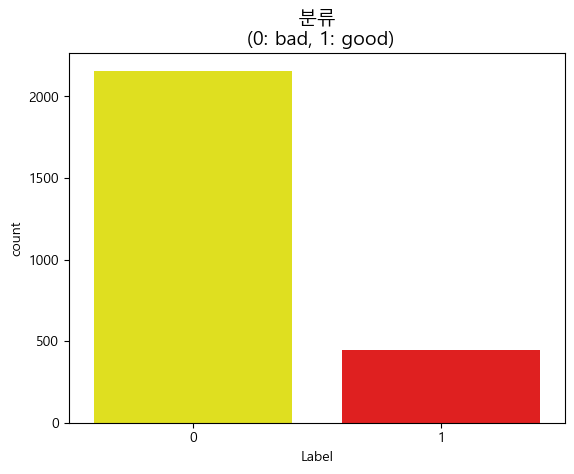

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

import seaborn as sns
colors = ["yellow", "red"]

sns.countplot(x='Label', data=df, palette=colors)

plt.title('분류\n (0: bad, 1: good)', fontsize=14)

#불균형 데이터셋

In [6]:
train_cols = df.columns[0:8]

X = df[train_cols] # 독립변수
y = df["Label"] # 종속변수

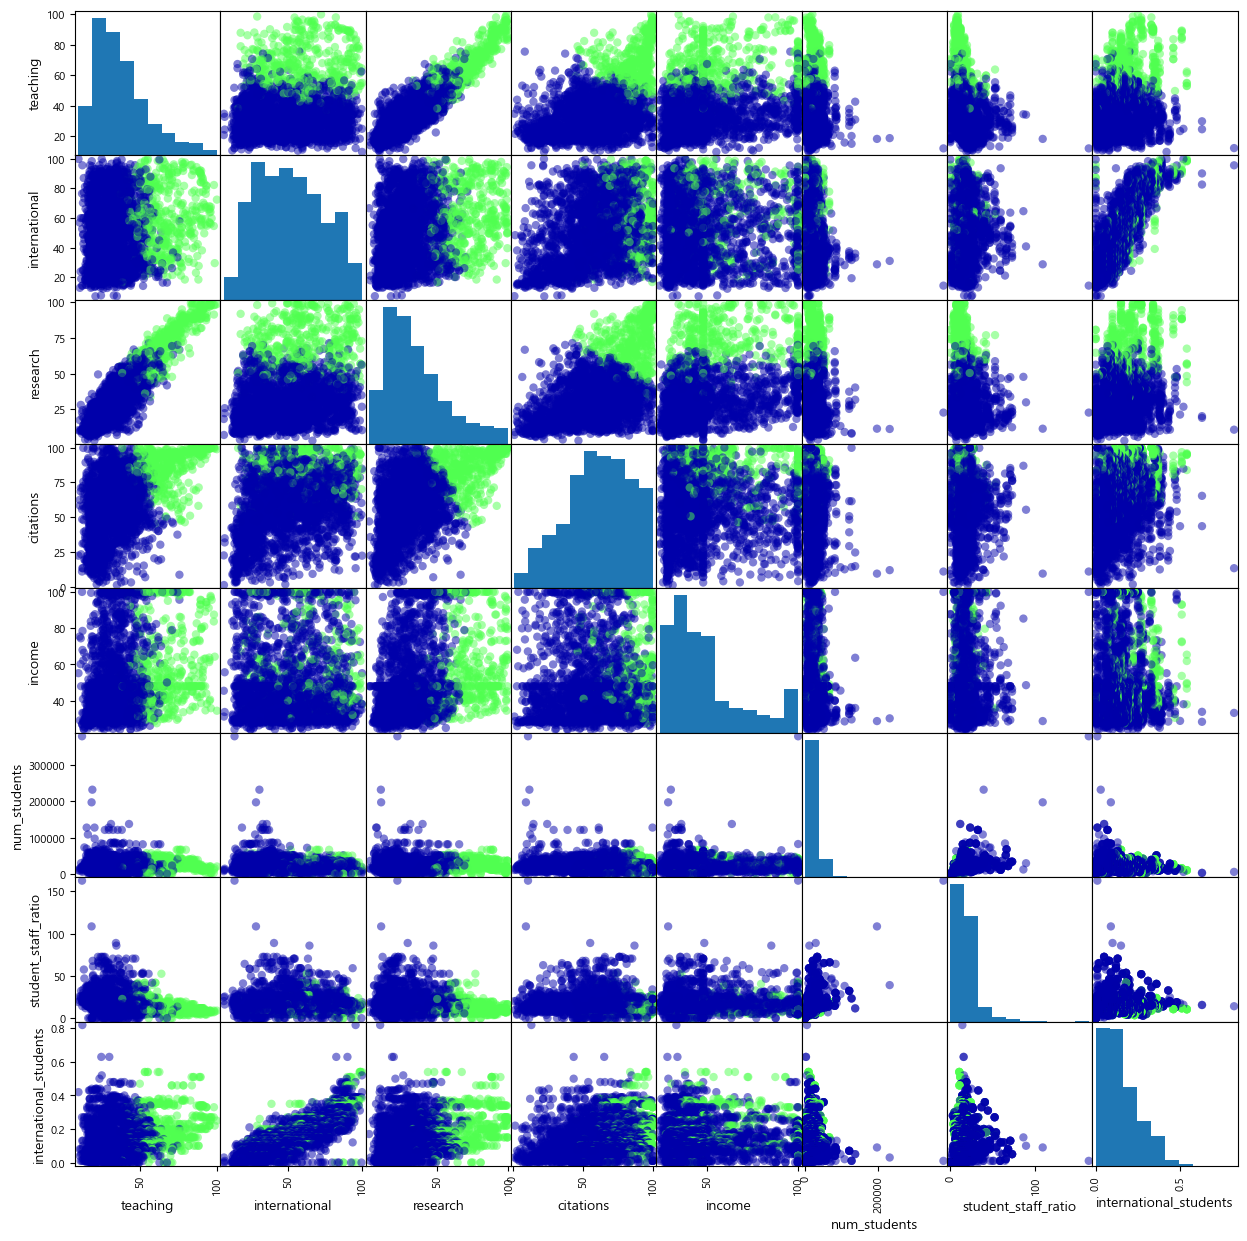

In [7]:
import mglearn

#산점도 행렬 출력
pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15),marker='o', cmap=mglearn.cm3)

plt.show()

In [20]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Label'])

print(X_samp)
print(y_samp)

df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["Label"].value_counts()

      teaching  international  research  citations  income  num_students  \
915       27.6           69.2      37.0       47.0    58.9         33391   
1757      41.1           47.3      52.2       63.4    97.8         32166   
360       44.8           71.4      32.4       34.2    65.5         26419   
653       30.7           89.9      30.5       74.9    31.5         18600   
808       30.1           63.4      35.3       67.5    57.8         28856   
...        ...            ...       ...        ...     ...           ...   
1249      65.1           56.4      69.1       83.0   100.0         35691   
634       79.1           62.8      87.9       96.9    48.0         14221   
343       96.3           59.8      99.4       99.7    95.6          2243   
131       48.1           87.6      58.5       73.3    79.7         50882   
534       61.5           77.8      68.1       74.5    40.8         31326   

      student_staff_ratio  international_students  
915                  35.8          

Label
0    445
1    445
Name: count, dtype: int64

In [9]:
X = df_samp[train_cols] # 독립변수
y = df_samp["Label"]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [11]:
from keras import Sequential
from keras.layers import Dense

class MyModel(Sequential):
    def __init__(self, input_nodes, hidden_layers,num_classes):
#       초기화함수
        super(MyModel, self).__init__(name='my_model')
#       상위클래스의            초기화함수 호출
        self.num_classes = num_classes
        self.add(Dense(hidden_layers[0], input_shape=(input_nodes,), activation='relu'))
        self.add(Dense(hidden_layers[1], activation='relu'))
        self.add(Dense(hidden_layers[2], activation='relu'))
        self.add(Dense(num_classes, activation='sigmoid'))

In [22]:
# 객체 생성
model = MyModel(len(X_train.columns), [128,64,32],1)
#객체       생성

#                       input          h1,h2,h3 ouput

#   input       h1      h2      h3      output
#   8           128     64      32      1

In [13]:
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


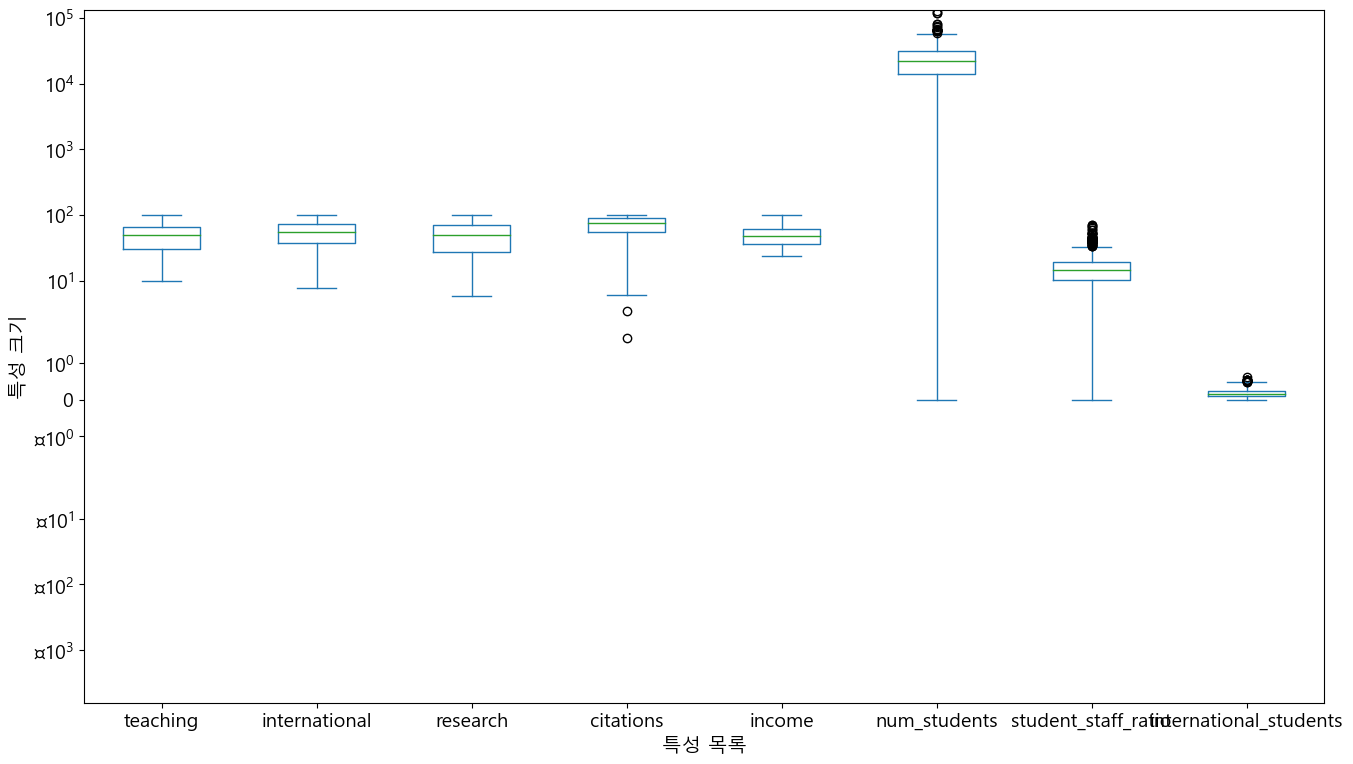

In [14]:
plt.rcParams["figure.figsize"]=(16,9)
plt.rcParams["font.size"]=14

df_samp[train_cols].plot.box()

plt.yscale("symlog")

plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

plt.show()

In [ ]:
#   StandardScaler  표준화, 평균 0, 표준편차 1
#   MinMaxScaler    정규화, 0.0 ~ 1.0
#   RobustScaler    outlier

In [23]:
# 학습용 데이터셋에서 특성별 최소값 계산
min_on_tr = X_train.min(axis=0)

# 학습용 데이터셋에서 특성별 (최대값 - 최소값) 범위 계산
range_on_tr = (X_train - min_on_tr).max(axis=0)

# 학습용 데이터셋에서 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최소값은 0 최대값은 1로 조정됨
X_train_scaled = (X_train - min_on_tr) / range_on_tr

print("특성별 최소값\n{0}\n".format(X_train_scaled.min(axis=0)))
print("특성별 최대값\n{0}".format(X_train_scaled.max(axis=0)))

# 검증용 데이터셋에도 같은 작업을 적용
# 학습용 데이터셋에서 계산한 최소값과 범위를 사용
X_test_scaled = (X_test - min_on_tr) / range_on_tr

특성별 최소값
teaching                  0.0
international             0.0
research                  0.0
citations                 0.0
income                    0.0
num_students              0.0
student_staff_ratio       0.0
international_students    0.0
dtype: float64

특성별 최대값
teaching                  1.0
international             1.0
research                  1.0
citations                 1.0
income                    1.0
num_students              1.0
student_staff_ratio       1.0
international_students    1.0
dtype: float64


In [16]:
from keras.callbacks import EarlyStopping  
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=5)
#       조기학습    평가기준            임계치              (발표할때 신경망은 자세히 설명)

# 조기학습 종료시 가장 성능이 좋았던 모형 저장
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# 5. 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[es, mc])

Epoch 1/50
18/18 [==============================] - 1s 18ms/step - loss: 0.2242 - accuracy: 0.6749 - val_loss: 0.1880 - val_accuracy: 0.8322
Epoch 2/50
18/18 [==============================] - 0s 8ms/step - loss: 0.1615 - accuracy: 0.8664 - val_loss: 0.1172 - val_accuracy: 0.9231
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 0.0986 - accuracy: 0.9104 - val_loss: 0.0654 - val_accuracy: 0.9371
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0729 - accuracy: 0.9033 - val_loss: 0.0511 - val_accuracy: 0.9441
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0645 - accuracy: 0.9227 - val_loss: 0.0553 - val_accuracy: 0.9441
Epoch 6/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0560 - accuracy: 0.9192 - val_loss: 0.0332 - val_accuracy: 0.9510
Epoch 7/50
18/18 [==============================] - 0s 7ms/step - loss: 0.0507 - accuracy: 0.9367 - val_loss: 0.0298 - val_accuracy: 0.9720
Epoch 8/50
18/18 [=

In [24]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


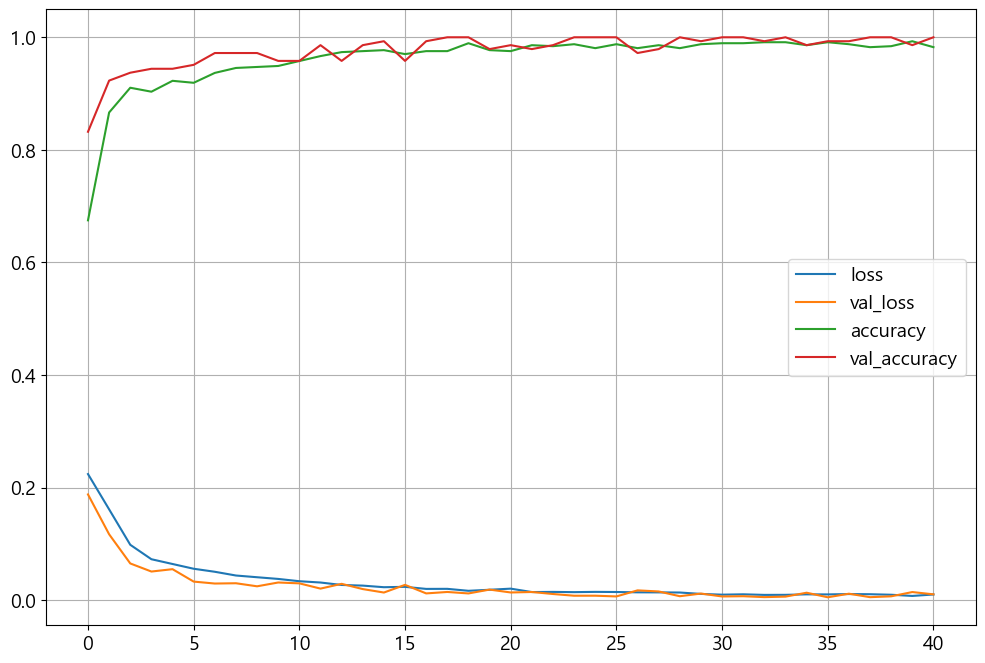

In [17]:
# 6. 모델 학습 과정 표시

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()

plt.show()

In [18]:
# 7. 모델 평가

scores = model.evaluate(X_train_scaled, y_train, verbose=1)

print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

23/23 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9972
[0.008372899144887924, 0.9971910119056702]
accuracy: 99.72%


In [19]:
scores = model.evaluate(X_test_scaled, y_test, verbose=1)

print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

6/6 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9944
[0.01043811533600092, 0.9943820238113403]
accuracy: 99.44%
